In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# file_name = '../daf_metric_results_folder/{}DAF_TPCC_08172020/{}daf_count_agg_woLogging_{}thread.csv'
file_name = '../coor_metric_results_folder/coor_count_agg_woLogging_{}thread.csv'
daf_thread_count = 0
thread_count_svg = 'thread.svg'
worker_thread_count = 20

In [3]:
def change_font_sizes():
    plt.rc('font', size=6)          # controls default text sizes
    plt.rc('axes', titlesize=6)     # fontsize of the axes title
    plt.rc('axes', labelsize=6)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
    plt.rc('legend', fontsize=6)    # legend fontsize
    plt.rc('figure', titlesize=6)  # fontsize of the figure title

In [4]:
# read data
# df = pd.read_csv(file_name.format(daf_thread_count, daf_thread_count, worker_thread_count), header=0, skipinitialspace=True)
df = pd.read_csv(file_name.format(worker_thread_count), header=0, skipinitialspace=True)
df = df.drop(columns=['start_time.1', 'cpu_id',
       'cpu_cycles', 'instructions', 'cache_ref', 'cache_miss',
       'ref_cpu_cycles_', 'block_read', 'block_write', 'memory_b',
       'elapsed_us'])
# clear useless zeros at the end
for index, row in df[::-1].iterrows():
    if row['total_num_actions'] == 0 and row['total_num_txns'] == 0:
        df = df.drop(df.index[[index]])
    else:
        break     
# match up the time
start_time = df.iloc[ 0 , : ]['start_time']
for index, row in df.iterrows():
    row['start_time'] -= start_time

In [5]:
# draw index_remove_key, txn_removal, unlink, and num_txn
change_font_sizes()
plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('time(microseconds)')
plt.ylabel('number processed since last recorded')
plt.plot( 'start_time', 'INDEX_REMOVE_KEY', data=df, marker='', color='mediumorchid', linewidth=0.3)
plt.plot( 'start_time', 'TXN_REMOVAL', data=df, marker='', color='royalblue', linewidth=0.3)
plt.plot( 'start_time', 'UNLINK', data=df, marker='', color='darkcyan', linewidth=0.3)
plt.plot( 'start_time', 'total_num_txns', data=df, marker='', color='red', linewidth=0.5)
plt.legend(loc='lower left', bbox_to_anchor=(0., 1.02, 1., .102), fancybox=True, shadow=True, ncol=4, mode='expand', borderaxespad=0.)
plt.savefig('../daf_metric_results_folder/{}daf_{}worker_breakdown.svg'.format(daf_thread_count, worker_thread_count), format='svg')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [6]:
# convert each count to equivalent num/second
ave_df = df.copy()
modify_columns = ['MEMORY_DEALLOCATION', 'CATALOG_TEARDOWN', 'INDEX_REMOVE_KEY', 'COMPACTION', 'LOG_RECORD_REMOVAL', 'TXN_REMOVAL', 'UNLINK', 'total_num_actions', 'total_num_txns']
prev_time = df.iloc[ 0 , : ]['start_time']
for index, row in ave_df.iterrows():
    interval = row['start_time'] - prev_time
    for col_name in modify_columns:
        if interval == 0:
            ave_df.at[index, col_name]  = 0
        else:  
            ave_df.at[index, col_name] = (row[col_name] * 1000000) / interval 
    prev_time = row['start_time']

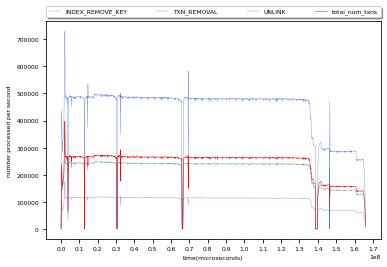

In [7]:
# draw index_remove_key, txn_removal, unlink, and num_txn
change_font_sizes()
plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('time(microseconds)')
plt.ylabel('number processed per second')
plt.plot( 'start_time', 'INDEX_REMOVE_KEY', data=ave_df, marker='', color='mediumorchid', linewidth=0.3)
plt.plot( 'start_time', 'TXN_REMOVAL', data=ave_df, marker='', color='royalblue', linewidth=0.3)
plt.plot( 'start_time', 'UNLINK', data=ave_df, marker='', color='darkcyan', linewidth=0.3)
plt.plot( 'start_time', 'total_num_txns', data=ave_df, marker='', color='red', linewidth=0.5)
plt.legend(loc='lower left', bbox_to_anchor=(0., 1.02, 1., .102), fancybox=True, shadow=True, ncol=4, mode='expand', borderaxespad=0.)
# plt.savefig('../daf_metric_results_folder/per_second_{}daf_{}worker_breakdown.svg'.format(daf_thread_count, worker_thread_count), format='svg')
plt.savefig('../coor_metric_results_folder/per_second_coor_{}worker_breakdown.svg'.format(worker_thread_count), format='svg')
# plt.clf()